# Feature Engineering on Twitter US Airline Dataset

### Methods Used:

1. Bag of Words
2. Bag of N-Grams
3. TF-IDF
4. Cosine Document Similarity
5. word2vec trained on our dataset with tensorflow
6. word2vec trained on our dataset with gensim
7. word2vec trained by Google on News dataset

## Import common packages

In [1]:
import pandas as pd
import numpy as np
import nltk

## Load Cleaned Data Set

See previous code submission from project proposal for extensive data cleaning steps.

In [2]:
cleanDF = pd.read_csv("C:\git\CSML1010-Group_11-Final-Project\proposal\Tweets_cleaned.csv") 
cleanDF.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'text',
       'text_cleaned', 'emojis_flag', 'emojis', 'emoticons_flag', 'emoticons',
       'text_cleaned_without_emojis_emoticons', 'hashtags',
       'text_cleaned_without_emojis_emoticons_hashtags', 'hashtags_flag',
       'text_cleaned_lower_case', 'text_cleaned_no_abbreviations',
       'text_list_no_stop_words', 'lemmas_list'],
      dtype='object')

## Bag of Words Model

A bag of words model is a simpleway to represent text data as numeric vectors.

Each column is a word from our data set, each row is a single tweet and the value in each row is the number of occurrences of that word in the tweet.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))
#.values.astype('U') converts the column of words to a unicode string
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

#pd.options.display.max_columns = 100
#pd.set_option('display.max_rows', 100)

#pd.DataFrame(cv_matrix, columns=vocab).to_csv("bagofwords.csv")

,00,000,000114,000lb,00a,00am,00p,00pm,01,01pm,...,zambia,zcc82u,zero,zig,zip,zipper,zone,zoom,zuke,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bag of N-Grams

A bag of n-grams model is similar to the bag of words model, but here we extend it to include a "bi-gram" of two words. This allows us to see the number of occurrences of two-word pairs in each of our tweets as a numeric vector.

In [5]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

#pd.DataFrame(bv_matrix, columns=vocab).to_csv("bagofngrams.csv")

,00 27,00 bag,00 check,00 don,00 flight,00 goodwill,00 happy,00 phone,00 pm,00 say,...,zone precious,zone space,zone thank,zoom sauce,zoom scroll,zuke non,zurich bc,zurich credit,zurich jfk,zurich new
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Model

The TF-IDF model is a slightly more complicated way of vectorizing our text data. It combines two different ways of looking at our text. *term frequency* and *inverse document frequency*. 

A more details explanation of how TF-IDF works is available elsewhere. For our purposes, it outputs scaled and normalized values which are more easily comparable and usable than bag of words-based models.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(cleanDF['lemmas_list'].values.astype('U'))
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

#pd.DataFrame(np.round(tv_matrix, 2), columns=vocab).to_csv("tfidfmodel.csv")

,00,000,000114,000lb,00a,00am,00p,00pm,01,01pm,...,zambia,zcc82u,zero,zig,zip,zipper,zone,zoom,zuke,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Document Similarity

This measure of document similarity uses a distance function to compare the vectors of each document (aka tweet) in our TF-IDF model. A value closer to 1 indicates a more similar document and a value closer to 0 indicates a dissimilar document. The values represent the cosine angle between the vectors for each tweet. 

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

#similarity_df.to_csv("documentsimilarity.csv")

,0,1,2,3,4,5,6,7,8,9,...,14630,14631,14632,14633,14634,14635,14636,14637,14638,14639
0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.084757,0.0,0.000000,0.000000,0.0,0.000000,0.114465
3,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,1.0,0.307344,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.000000,0.0,0.0,0.028866,0.0,0.0,0.0,0.0,...,0.30427,0.188921,0.0,0.052285,0.0,1.000000,0.046479,0.0,0.033641,0.070611
14636,0.0,0.0,0.000000,0.0,0.0,0.026716,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.098288,0.0,0.046479,1.000000,0.0,0.031135,0.065351
14637,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000
14638,0.0,0.0,0.000000,0.0,0.0,0.019337,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.035024,0.0,0.033641,0.031135,0.0,1.000000,0.047300


## Word2Vec Word Embedding Model
### Training with CBOW (Continuous Bag of Words)

Now, we look at a more advanced model. Here, we implement a word embedding model. Word embedding is a way of representing individual words in such a way that words that are similar are represented similarly.

We do this using a word2vec model which represents words as multi-dimensional vectors (in this case 100 dimensions).

We build a model from scratch here using *keras* and *tensorflow* to build a *Continuous Bag of Words* (CBOW) model. A CBOW takes multiple words that surround a target word as input, and predicts the target word based on that input.

#### Build Vocabulary

In [9]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(cleanDF['lemmas_list'].values.astype('U'))
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in cleanDF['lemmas_list'].values.astype('U')]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Using TensorFlow backend.


Vocabulary Size: 8872
Vocabulary Sample: [('flight', 1), ('thank', 2), ('hour', 3), ('cancel', 4), ('service', 5), ('time', 6), ('delay', 7), ('customer', 8), ('help', 9), ('get', 10)]


#### Build (context_words, target_word) pair generator

In [10]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [11]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['plus', 'add', 'experience', 'tacky'] -> Target (Y): commercial
Context (X): ['aggressive', 'blast', 'entertainment', 'guest'] -> Target (Y): obnoxious
Context (X): ['blast', 'obnoxious', 'guest', 'face'] -> Target (Y): entertainment
Context (X): ['obnoxious', 'entertainment', 'face', 'little'] -> Target (Y): guest
Context (X): ['entertainment', 'guest', 'little', 'recourse'] -> Target (Y): face
Context (X): ['seriously', 'pay', 'seat', 'playing'] -> Target (Y): flight
Context (X): ['pay', 'flight', 'playing', 'bad'] -> Target (Y): seat
Context (X): ['flight', 'seat', 'bad', 'thing'] -> Target (Y): playing
Context (X): ['seat', 'playing', 'thing', 'fly'] -> Target (Y): bad
Context (X): ['playing', 'bad', 'fly', 'va'] -> Target (Y): thing
Context (X): ['yes', 'nearly', 'fly', 'vx'] -> Target (Y): time


#### Build CBOW Deep Network Model

In [12]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

import tensorflow as tf
with tf.device('/gpu:0'):
    
    cbow = Sequential()
    cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
    cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
    cbow.add(Dense(vocab_size, activation='softmax'))

    cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            887200    
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8872)              896072    
Total params: 1,783,272
Trainable params: 1,783,272
Non-trainable params: 0
_________________________________________________________________
None


##### Visualize Model

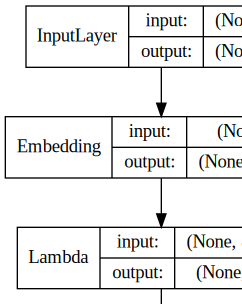

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

#### Train model for 5 epochs

In [ ]:
with tf.device('/gpu:0'):
    for epoch in range(1, 6):
        loss = 0.
        i = 0
        for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
            i += 1
            loss += cbow.train_on_batch(x, y)
            if i % 100000 == 0:
                print('Processed {} (context, word) pairs'.format(i))

        print('Epoch:', epoch, '\tLoss:', loss)
        print()

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Processed 100000 (context, word) pairs
Epoch: 1 	Loss: 980699.2105463557

Processed 100000 (context, word) pairs
Epoch: 2 	Loss: 1144282.866285345

Processed 100000 (context, word) pairs
Epoch: 3 	Loss: 1337395.7755461363

Processed 100000 (context, word) pairs
Epoch: 4 	Loss: 1453879.772978104



#### Get word embeddings

In [30]:
#load weights (COMMENT OUT BELOW if re-training)
weights = pd.read_csv("word2vecCBOWtrained.csv") 
weights = cbow.get_weights()[0]
weights = weights[1:]

print(weights.shape)



#word2vecCBOWtrained = pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

#pd.DataFrame(weights, index=list(id2word.values())[1:]).to_csv("word2vecCBOWtrained.csv")

(8871, 100)


#### Build a distance matrix to view the most similar words (contextually)¶

In [40]:
#load word embeddings (COMMENT OUT BELOW if re-training)
word2vecCBOWtrained = pd.read_csv("word2vecCBOWtrained.csv") 

from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['flight', 'airline', 'good', 'bad', 'time', 'seat', 'amazing', 'experience']}

similar_words

(8871, 8871)


{'flight': ['7hours', 'functionality', 'tvs', 'us2065', 'typical'],
 'airline': ['rocky', 'reduction', 'squeak', 'dedicated', 'prohibit'],
 'good': ['dnx58v', 'fog', 'fax', 'rr', '💙'],
 'bad': ['ua1266', 'win', 'lekvhg', 'crucial', 'underserved'],
 'time': ['practice', 'm', 'aa3230', 'wifi', 'loading'],
 'seat': ['taiwan', 'bogota', 'brendan', 'fudgin', 'yaayy'],
 'amazing': ['steve', "nat'l", '24hours', 'row7', 'eyewitness'],
 'experience': ['jean', 'any1', 'attitude', 'baby', 'hayes']}

#### Visualize word embeddings

In [44]:
word2vecCBOWtrained.iloc[:, 0]


0             thank
1              hour
2            cancel
3           service
4              time
           ...     
8823         stuffy
8824    arbitrarily
8825    retribution
8826          aires
8827            PAD
Name: Unnamed: 0, Length: 8828, dtype: object

## Word2Vec Word Embedding Model
### Using gensim to train model

Now, to give us another feature to compare with, we will generate a similar word2vec model, using the Continuous Bag of Words model - this time, using gensim. We are again training this on our own data set, so we expect similar results. It will be a good double-check that both models are performing similarly.

In [16]:
from gensim.models import word2vec

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in (cleanDF['lemmas_list'].values.astype('U'))]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 30          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['flight', 'airline', 'terrible', 'awesome', 'good', 'bad', 'time', 'seat', 'amazing', 'experience']}
similar_words

{'flight': ['fvf9yw', 'flightation', 'notify', 'flightlation', 'ua978'],
 'airline': ['saddening', 'absolute', 'faithful', 'business', 'investment'],
 'terrible': ['disappointed',
  'awful',
  'because',
  'spontaneously',
  'unpleasant'],
 'awesome': ['fantastic', 'great', 'amazing', 'kudo', 'wonderful'],
 'good': ['appleton', 'well', 'comfortable', 'bad', 'favorite'],
 'bad': ['horrible', 'awful', 'terrible', 'flying', 'nat'],
 'time': ['gla', 'min', 'goddamn', 'ua51', 'everytime'],
 'seat': ['economy', 'leg', 'voluntarily', 'seating', 'lgjw7b'],
 'amazing': ['fantastic', 'miracle', 'c22', 'awesome', '👍'],
 'experience': ['investment', 'guru', 'confrontational', 'officially', 'exp']}

In [47]:
from gensim.models import KeyedVectors

#export model
#w2v_model.wv.save_word2vec_format(fname='gensim_word2vec_trained.bin', binary=True)

#### Visualize word embeddings

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128077 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56842 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 10548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\li

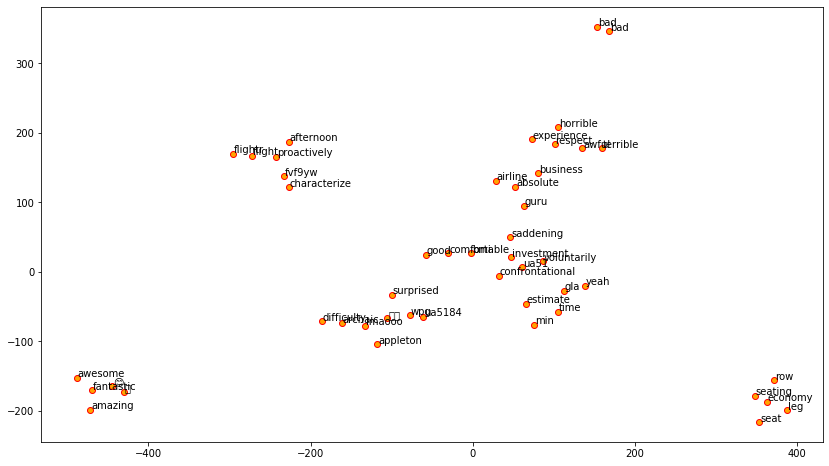

In [48]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Word2Vec Word Embedding Model
### Using Pre-Trained Model from Google
##### Subet of Google's word2vec model for the 500,000 most frequent words

For our final model, instead of training our own word2vec model, we instead download Google's pre-trained word2vec model. Google has trained this model on articles from its news service and it includes 300 dimensions in almost 3.7 GB. This is not a manageable size, but we still want to load Google's model to compare to our custom-trained models.

To make this manageable, when loading the model we limit it to the first 500,000 rows. Google's model is organized with the most frequent words at the beginning of the dataset so this should be an effective reduction.

We save this reduced model to use in our benchmarking.

In [49]:
from gensim.models import KeyedVectors

w2v_model = KeyedVectors.load_word2vec_format(r'C:\Users\Patrick\gensim-data\word2vec-google-news-300\word2vec-google-news-300\GoogleNews-vectors-negative300.bin', binary=True, limit=500000)

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['flight', 'airline', 'good', 'bad', 'time', 'seat', 'amazing', 'experience']}
similar_words

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


{'flight': ['flights', 'plane', 'Flight', 'airplane', 'takeoff'],
 'airline': ['airlines', 'Airlines', 'Airline', 'Airways', 'Lufthansa'],
 'good': ['great', 'bad', 'terrific', 'decent', 'nice'],
 'bad': ['good', 'terrible', 'horrible', 'Bad', 'lousy'],
 'time': ['day', 'moment', 'days', 'period', 'periods'],
 'seat': ['seats', 'Seat', 'Seats', 'seat_vacated', 'seated'],
 'amazing': ['incredible',
  'awesome',
  'unbelievable',
  'fantastic',
  'phenomenal'],
 'experience': ['experiences',
  'expertise',
  'expereince',
  'experince',
  'knowledge']}

In [50]:
from gensim.models import KeyedVectors

#export model
#w2v_model.wv.save_word2vec_format(fname='gensim_word2vec_google_subset.bin', binary=True)

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


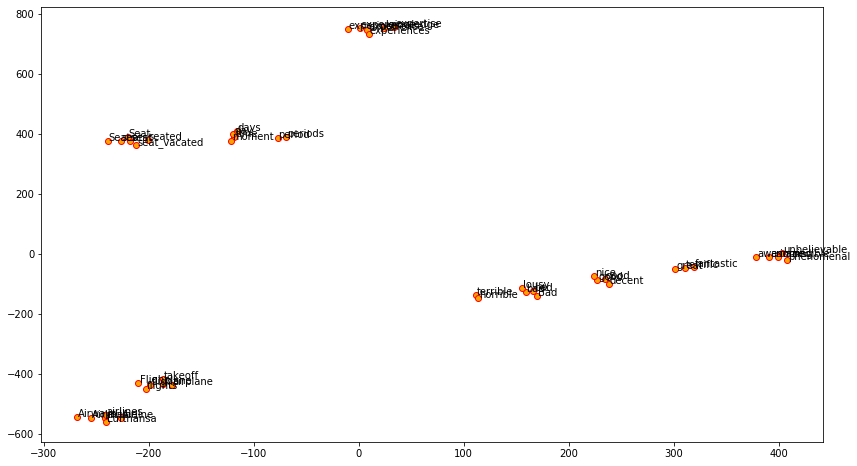

In [51]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# GloVe Embeddings with spaCy

In [7]:
import spacy

nlp = spacy.load('en_vectors_web_lg')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


In [8]:
unique_words = list(set([word for sublist in [doc.split() for doc in cleanDF['lemmas_list'].values.astype('U')] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
reinforcement,-0.081670,0.813500,0.023805,-0.085249,-0.230950,-0.303480,-0.269250,0.435900,-0.290920,0.29710,...,-0.075336,0.107440,-0.738050,0.011533,0.268150,0.379440,0.408270,0.395030,0.015261,-0.173130
east,0.312140,-0.123250,0.440540,-0.193180,1.199000,0.077333,-0.350180,0.555330,-0.078159,2.77560,...,-0.297600,0.577460,-0.583000,0.056100,0.145190,-0.013725,-0.095788,-0.056274,-0.739050,-0.330250
need,0.120600,0.142640,-0.155790,-0.010927,-0.003515,-0.084220,0.046459,0.125890,0.033200,2.28010,...,-0.240470,-0.005156,-0.218930,-0.346670,0.113510,0.031312,-0.205400,-0.386600,0.056625,0.015477
treat,-0.241600,0.023819,-0.255100,-0.054112,-0.175520,-0.529110,-0.204360,-0.382910,0.136140,2.18660,...,0.156650,-0.283650,-0.318150,-0.185780,-0.107820,-0.432420,0.174480,-0.338010,0.002220,0.199070
steaming,0.065575,-0.776730,0.105230,-0.018650,-0.220840,0.306390,-0.395620,0.106160,0.120030,0.67208,...,0.459680,-0.141840,0.108310,-0.699340,-0.134690,0.125570,-0.136660,0.578660,-0.630480,-0.340470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blackish,0.750690,-0.493330,0.245170,0.163020,0.543420,0.190190,0.190930,0.225370,0.229710,-0.93530,...,-0.033386,-0.230580,-0.275020,-1.139700,-0.421840,0.893760,0.319190,-0.242960,0.327510,0.202550
appoint,0.404330,-0.458980,-0.003519,0.202360,0.027130,-0.598300,0.047525,-0.160540,-0.262020,2.41760,...,0.251590,-0.317190,-0.006558,-0.413750,-0.574580,-0.180910,0.357980,-0.824950,0.081488,-0.743300
blasting,0.087572,0.038999,-0.216000,-0.143280,0.013331,-0.118330,0.276380,-0.024383,-0.146000,1.03340,...,-0.184490,-0.689440,0.434390,0.111930,0.041141,0.305260,-0.438300,0.393740,-0.539420,0.009073
tequila,-0.274930,-0.091834,0.856520,-0.009400,0.588740,-0.265990,-0.255300,0.385770,0.029642,0.49242,...,0.595800,0.253970,-0.278100,0.156590,0.092728,0.143020,-0.686830,-1.133100,-0.011531,-0.137830


In [ ]:
#Export

#export = pd.DataFrame(word_glove_vectors, index=unique_words).to_csv("glove_embeddings.csv")

from gensim.models import KeyedVectors

#export model
#export.save_word2vec_format(fname='glove_embeddings.bin', binary=True)

# Visualize GloVe word embeddings

In [12]:
unique_words = list(set([word for sublist in [doc.split() for doc in cleanDF['lemmas_list'].values.astype('U')] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
word_glove_vectors = pd.DataFrame(word_glove_vectors, index=unique_words)

In [22]:
from random import sample

word_glove_vectors_sample = word_glove_vectors.sample(n = 250)
#len(word_glove_vectors)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors_sample)
labels = unique_words

C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 127922 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\milestone1\li

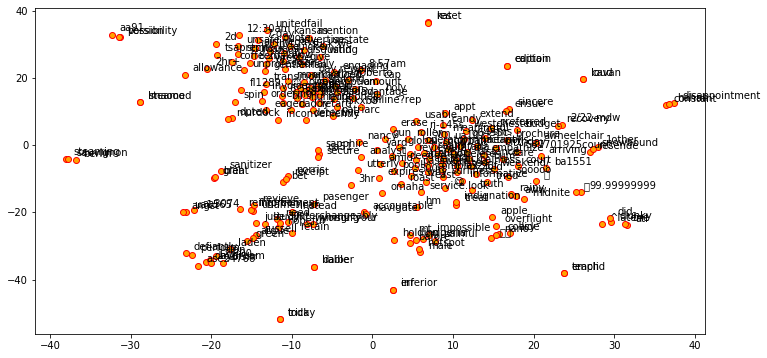

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Cluster documents with GloVe Embeddings

In [ ]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in cleanDF['lemmas_list'].values.astype('U')])

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

# General Testing

In [52]:
#check if using GPU
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
#test execution on GPU
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

# Reference:

Much of the example code is credited to Dipanjan (DJ) Sarkar at:

https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41 

and 

https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa